In [3]:
from sklearn.cross_decomposition import CCA
import numpy as np
from scipy.io import loadmat
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pickle

In [5]:
import os
print(os.getcwd())

/home/noman/muSim


/home/noman/anaconda3/lib/python3.11/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


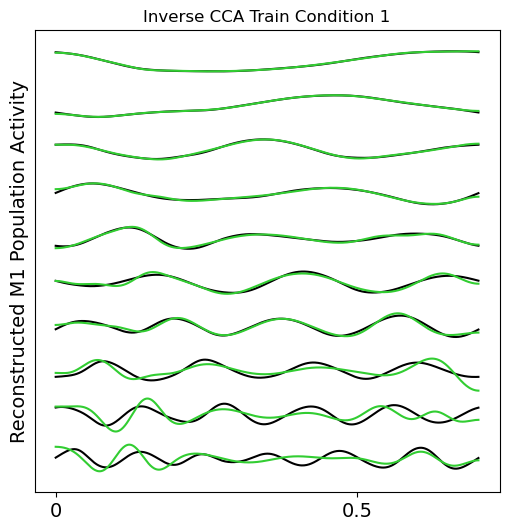

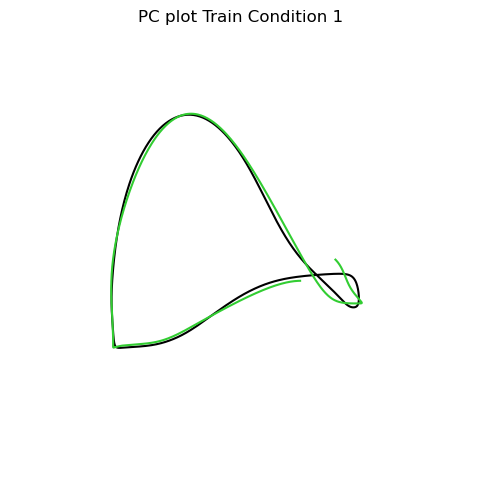

Correlation for Train Condition 1 0.9987333434956867


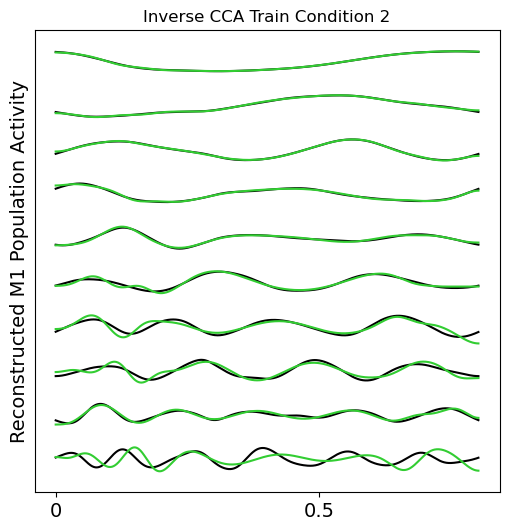

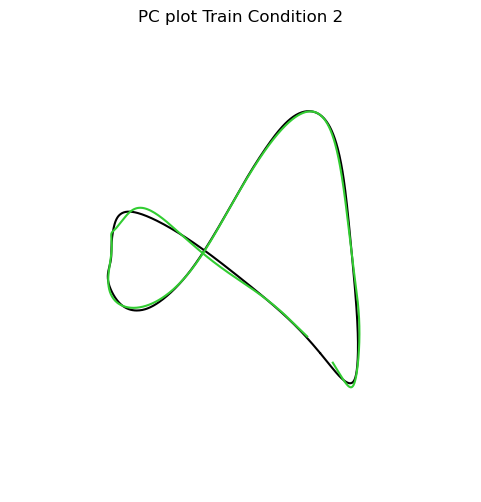

Correlation for Train Condition 2 0.9991301826234217


/home/noman/anaconda3/lib/python3.11/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


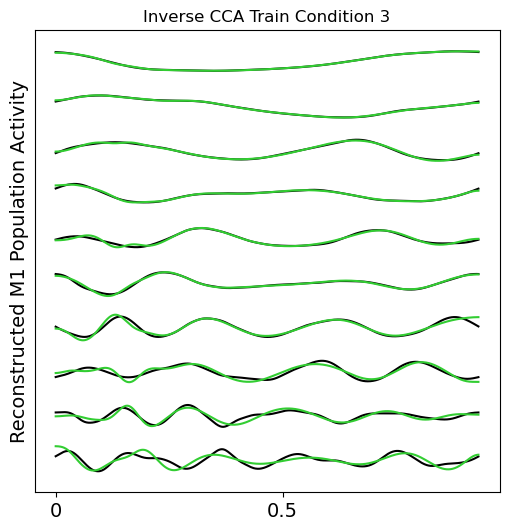

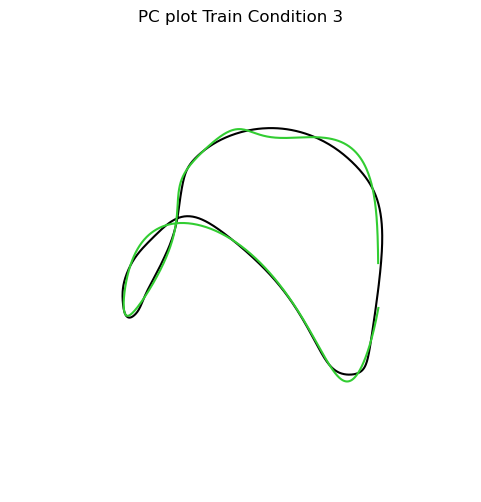

Correlation for Train Condition 3 0.9986166720165799


/home/noman/anaconda3/lib/python3.11/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


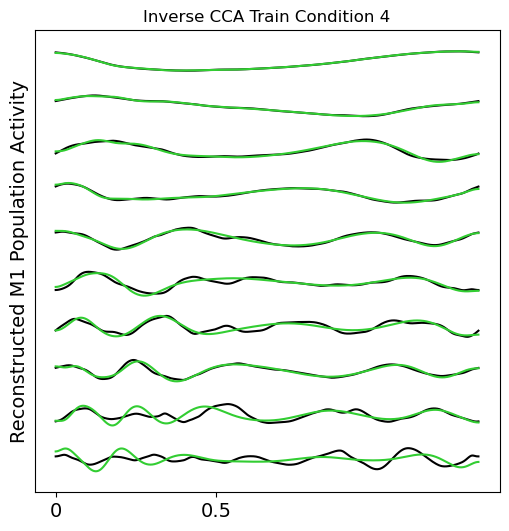

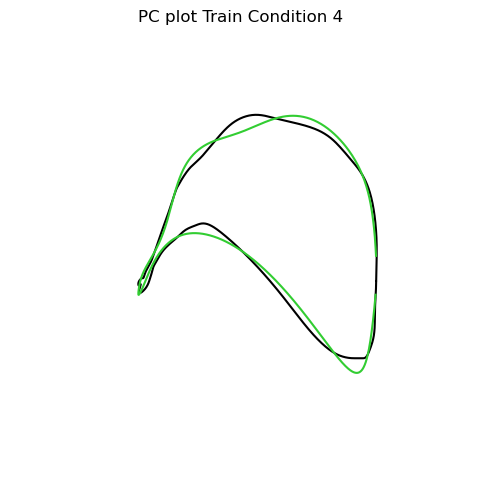

Correlation for Train Condition 4 0.9943197220719376


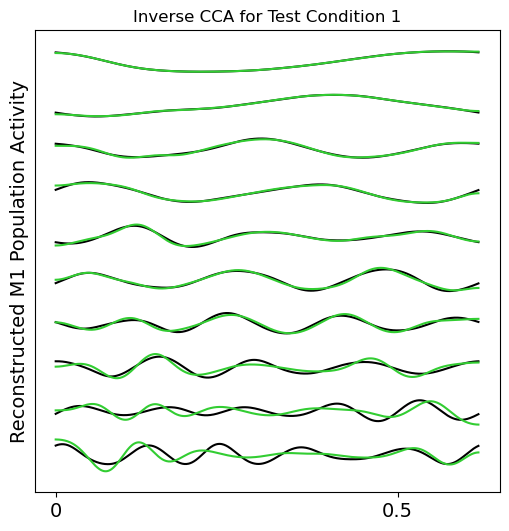

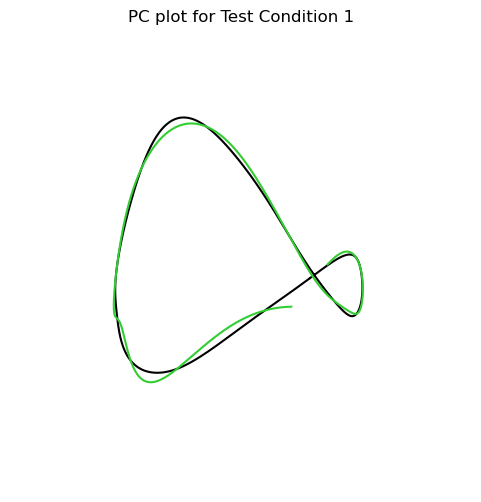

Correlation for Test Condition 1 0.9979866196171098


/home/noman/anaconda3/lib/python3.11/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


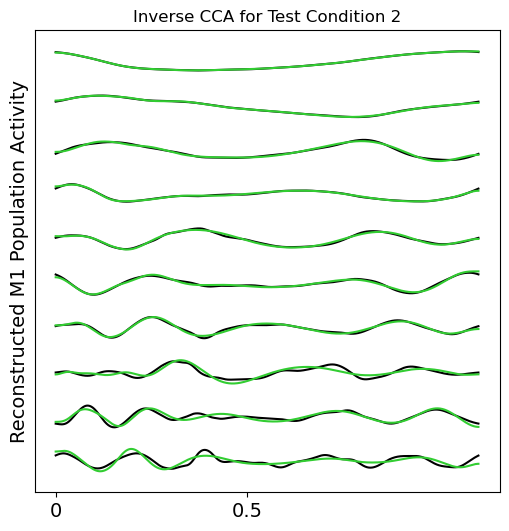

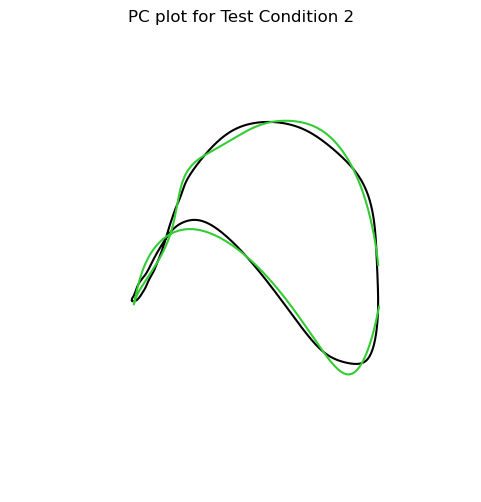

Correlation for Test Condition 2 0.996904275729475


In [7]:
#Load the nusim and experimental activities

#Load nusim for training and testing

with open("./Neural_Analysis/Training/nusim_train.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    nusim_train = pickle.load(file)

with open("./Neural_Analysis/Testing/nusim_test.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    nusim_test = pickle.load(file)

#Load experimental for training and testing

with open("./Neural_Analysis/Training/exp_train.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    exp_train = pickle.load(file)

with open("./Neural_Analysis/Testing/exp_test.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    exp_test = pickle.load(file)

# Now do the CCA for the training conditions and plot those one-by-one
for i_cond in range(len(nusim_train)+len(nusim_test)):
	
	if i_cond < len(nusim_train):
		A_exp = exp_train[i_cond]
		A_agent = nusim_train[i_cond]
	else:
		i_cond_test = i_cond - len(nusim_train)
		A_exp = exp_test[i_cond_test]
		A_agent = nusim_test[i_cond_test]

	#First filter the agent's activity with 20ms gaussian as done with experimental activity during preprocessing
	A_agent = gaussian_filter1d(A_agent.T, 20).T

	#Reduce the activity using PCA to the first 10 components
	PC_agent = PCA(n_components= 10)
	PC_exp = PCA(n_components= 10)
	#

	# A_agent = PC_agent.fit_transform(A_agent)
	A_exp = PC_exp.fit_transform(A_exp)
	A_agent = PC_agent.fit_transform(A_agent)

	#Do the CCA
	cca = CCA(n_components=10)
	U_c, V_c = cca.fit_transform(A_exp, A_agent)

	result = np.corrcoef(U_c[:,9], V_c[:,9])
	U_prime = cca.inverse_transform(V_c)

	plt.figure(figsize= (6, 6))

	for k in range(10):
	    if k==0:
	        plt.plot(A_exp[:,9-k]/np.max(A_exp[:,9-k]) + k*4, linewidth=1.5, c = 'k')
	        plt.plot(U_prime[:,9-k]/np.max(A_exp[:,9-k]) + k*4, linewidth= 1.5, c=(50/255, 205/255, 50/255), label= 'Network Reconstruction')
	    else:
	        plt.plot(A_exp[:, 9 - k]/np.max(A_exp[:,9-k]) + k * 4, linewidth=1.5, c='k')
	        plt.plot(U_prime[:, 9 - k]/np.max(A_exp[:,9-k]) + k * 4, linewidth=1.5, c=(50 / 255, 205 / 255, 50 / 255))

	plt.ylabel('Reconstructed M1 Population Activity', size=14)
	plt.xticks([0, 500], ['0', '0.5'], size= 14)
	plt.yticks([])
	# plt.legend()
	# plt.savefig('C:/Users/malma/Dropbox/NatureFigs2/Fig2/CCA_619.svg', format='svg', dpi=300, transparent= True)
	if i_cond < len(nusim_train):
		plt.title(f"Inverse CCA Train Condition {i_cond+1}")
	else:
		plt.title(f"Inverse CCA for Test Condition {i_cond_test+1}")
	plt.show()

	#Now plot the PCs on the same plot here
	ax = plt.figure(figsize= (6,6), dpi=100).add_subplot(projection='3d')
	ax.plot(A_exp[:,0], A_exp[:, 1], A_exp[:, 2], c = 'k')
	ax.plot(U_prime[:,0], U_prime[:, 1], U_prime[:, 2], c=(50/255, 205/255, 50/255))

	# Hide grid lines
	ax.grid(False)
	plt.grid(b=None)

	# Hide axes ticks
	ax.set_xticks([])
	ax.set_yticks([])
	ax.set_zticks([])
	plt.axis('off')

	if i_cond < len(nusim_train):
		plt.title(f"PC plot Train Condition {i_cond+1}")
	else:
		plt.title(f"PC plot for Test Condition {i_cond_test+1}")

	plt.show()
	# plt.savefig('C:/Users/malma/Dropbox/NatureFigs2/Fig2/PCA_619.svg', format='svg', dpi=300, transparent= True)

	sum = 0
	for k in range(3):
	    sum = sum + np.corrcoef(A_exp[:, k], U_prime[:, k])[0, 1]
	average = sum / 3;

	if i_cond < len(nusim_train):
		print(f"Correlation for Train Condition {i_cond+1}", average)
	else:
		print(f"Correlation for Test Condition {i_cond_test+1}", average)

In [8]:
from sklearn.cross_decomposition import CCA
import numpy as np
from scipy.io import loadmat
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from scipy.ndimage import gaussian_filter1d
import pickle

R2 nuSim, Condition Train1 0.9605855591100234
R2 Open Loop RNN, Condition Train1 0.9605855591100234


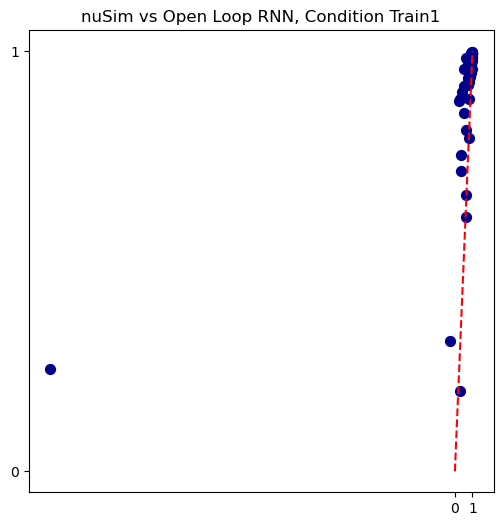

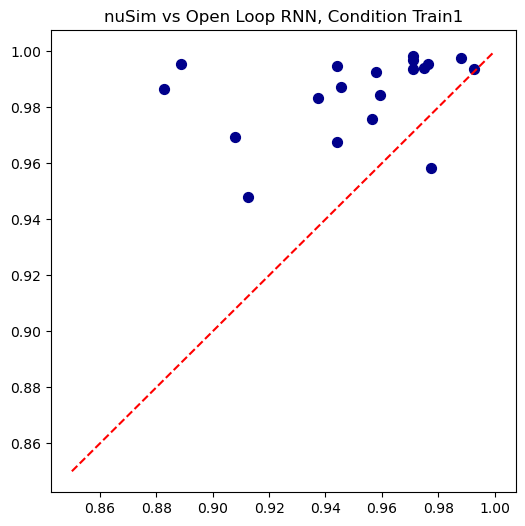

R2 nuSim, Condition Train2 0.9541774624988262
R2 Open Loop RNN, Condition Train2 0.9541774624988262


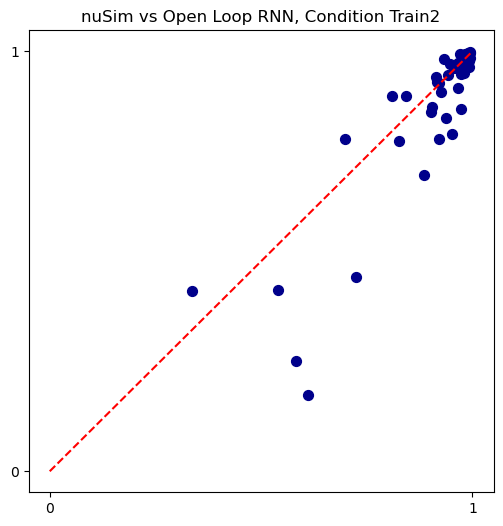

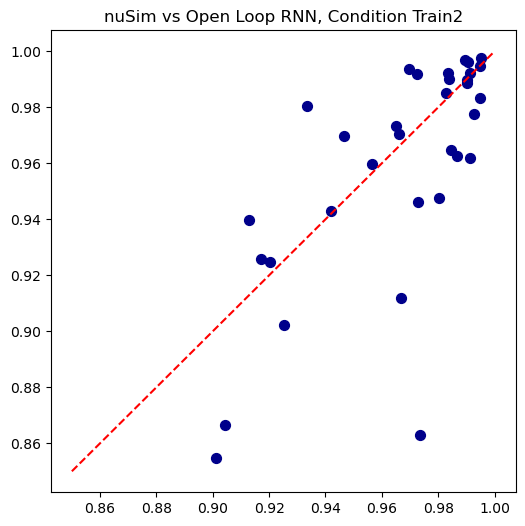

R2 nuSim, Condition Train3 0.9395206132258838
R2 Open Loop RNN, Condition Train3 0.9395206132258838


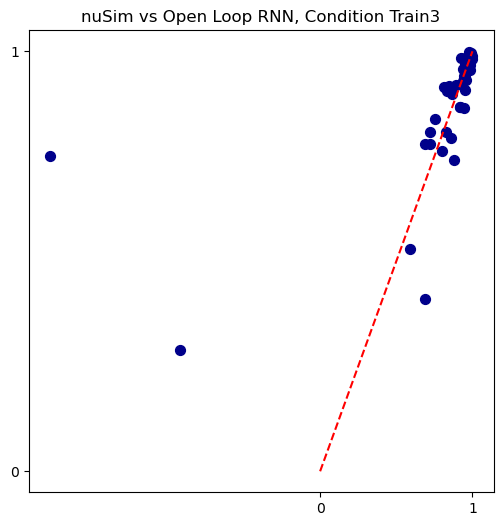

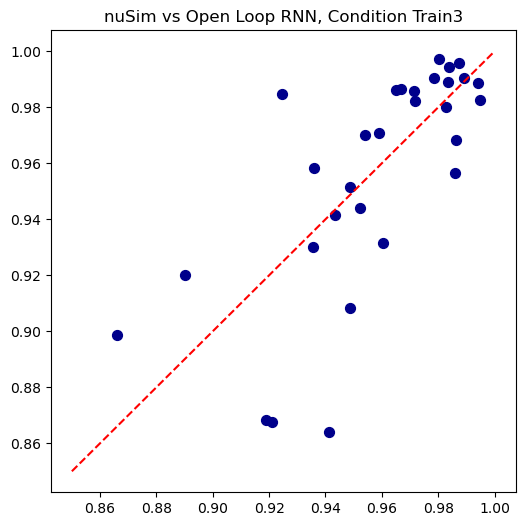

R2 nuSim, Condition Train4 0.8103265852941834
R2 Open Loop RNN, Condition Train4 0.8103265852941834


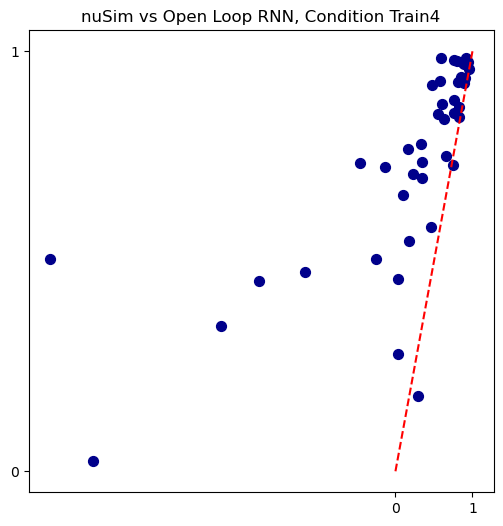

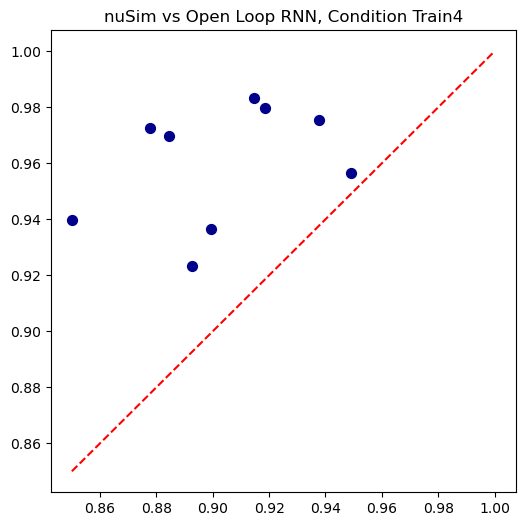

R2 nuSim, Condition Test1 0.8555298450625165
R2 Open Loop RNN, Condition Test1 0.8555298450625165


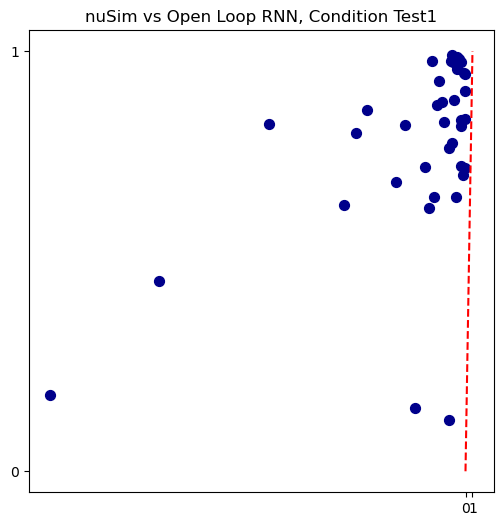

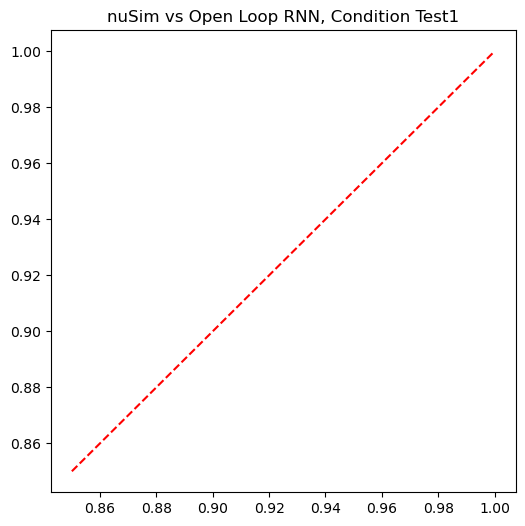

R2 nuSim, Condition Test2 0.9457053092741872
R2 Open Loop RNN, Condition Test2 0.9457053092741872


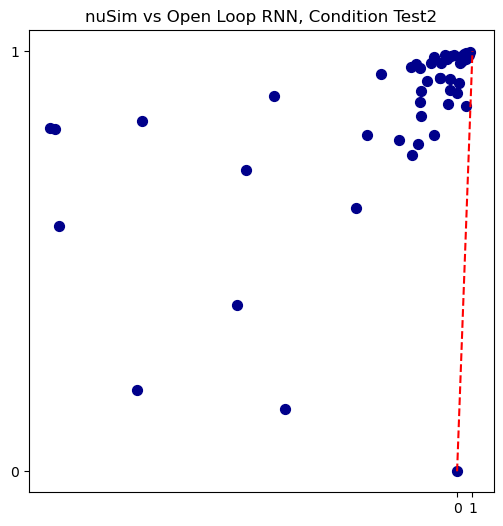

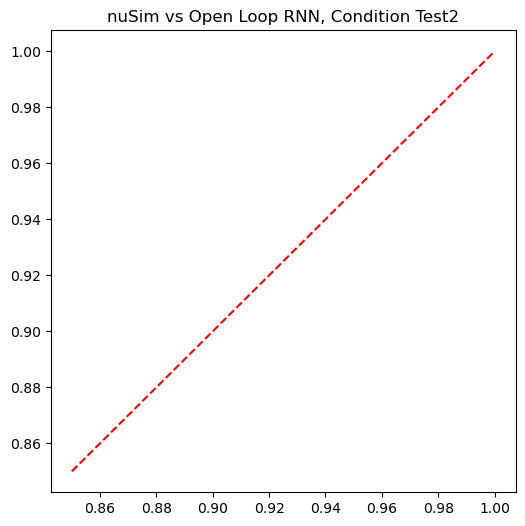

R2 nuSim, Condition Train1 0.9605855591100234
R2 EMG, Condition Train1 0.9605855591100234


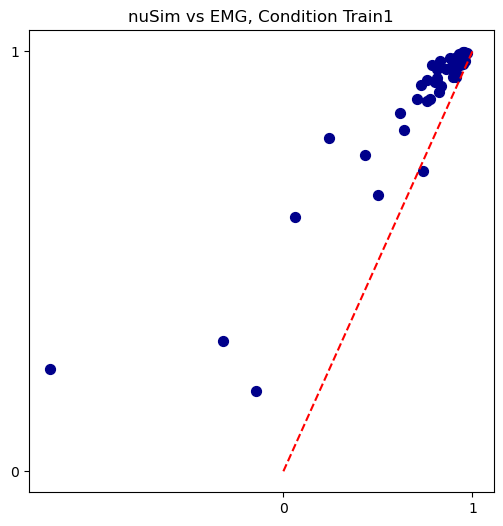

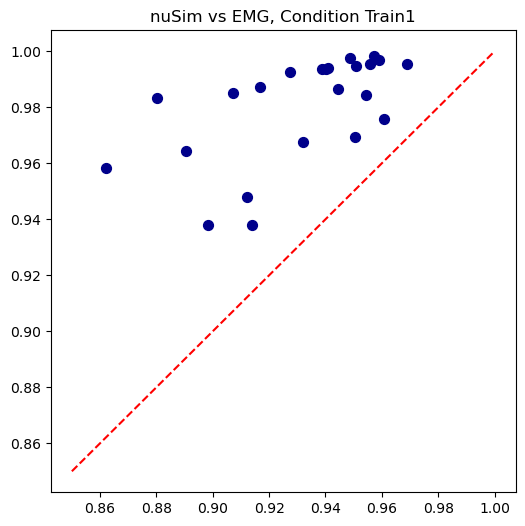

R2 nuSim, Condition Train2 0.9541774624988262
R2 EMG, Condition Train2 0.9541774624988262


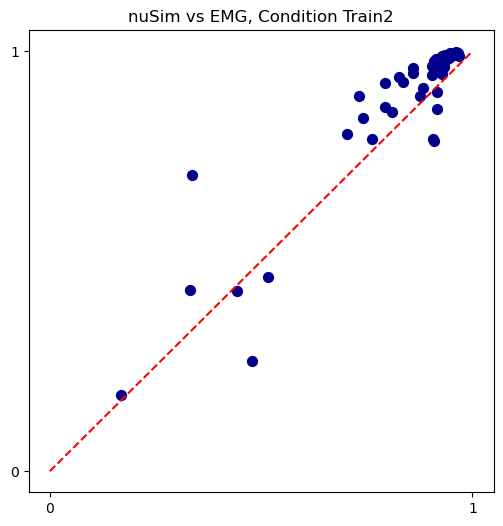

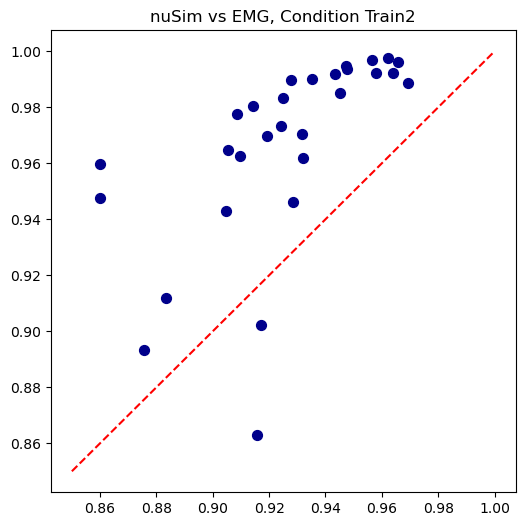

R2 nuSim, Condition Train3 0.9395206132258838
R2 EMG, Condition Train3 0.9395206132258838


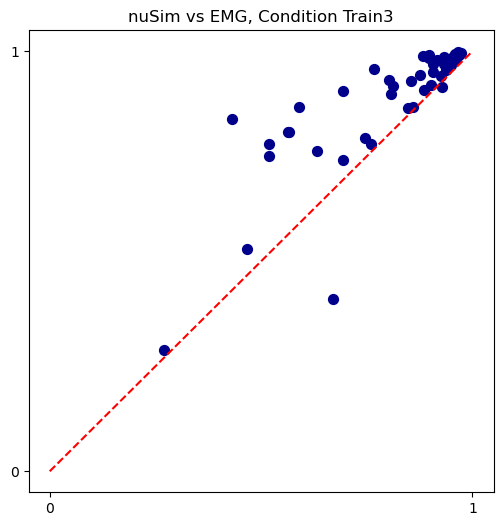

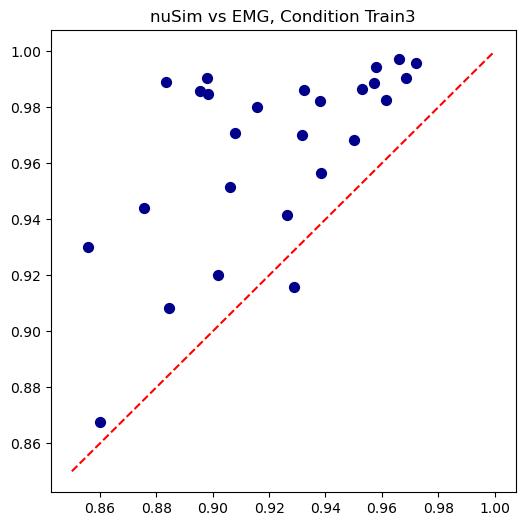

R2 nuSim, Condition Train4 0.8103265852941834
R2 EMG, Condition Train4 0.8103265852941834


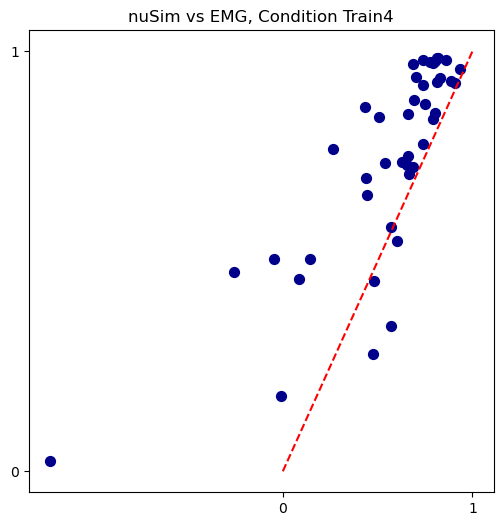

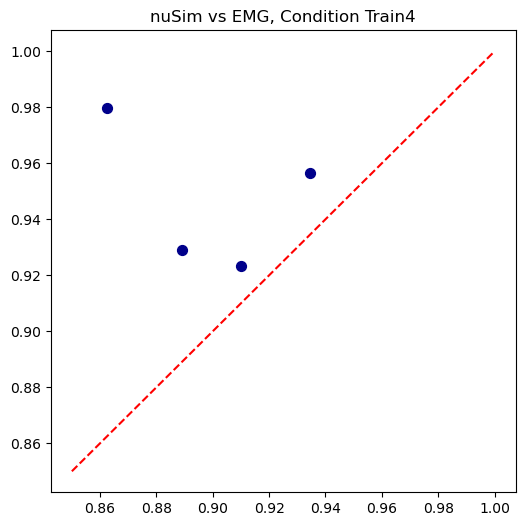

R2 nuSim, Condition Test1 0.8555298450625165
R2 EMG, Condition Test1 0.8555298450625165


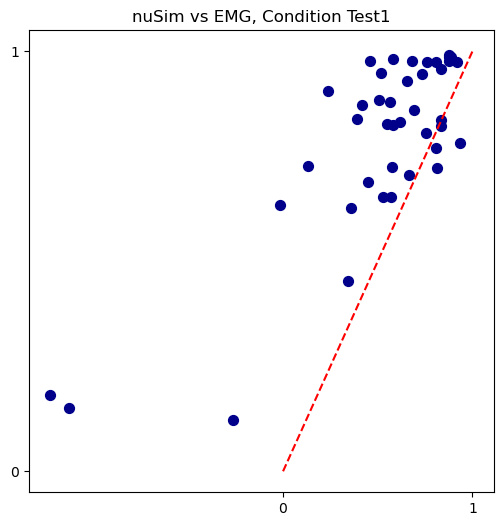

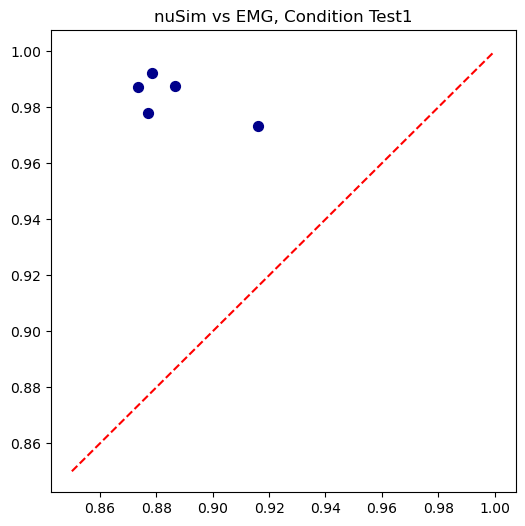

R2 nuSim, Condition Test2 0.9457053092741872
R2 EMG, Condition Test2 0.9457053092741872


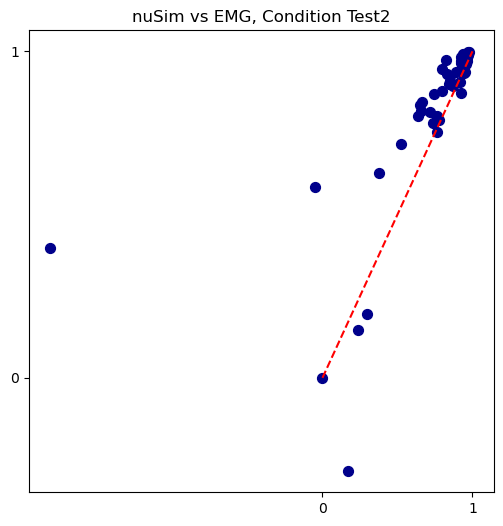

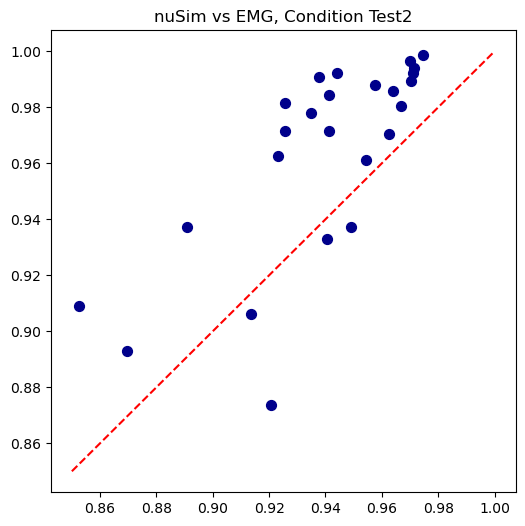

R2 nuSim, Condition Train1 0.9605855591100234
R2 Kinematics, Condition Train1 0.9605855591100234


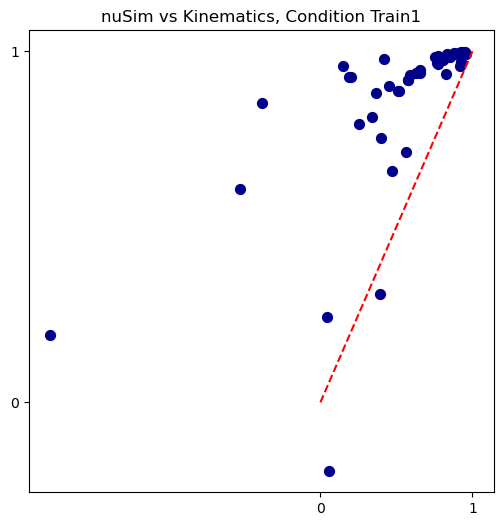

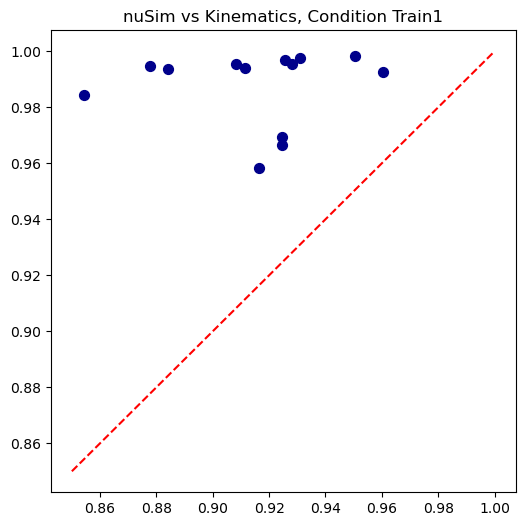

R2 nuSim, Condition Train2 0.9541774624988262
R2 Kinematics, Condition Train2 0.9541774624988262


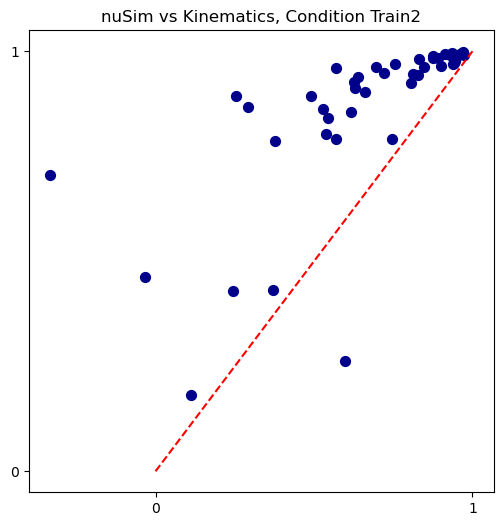

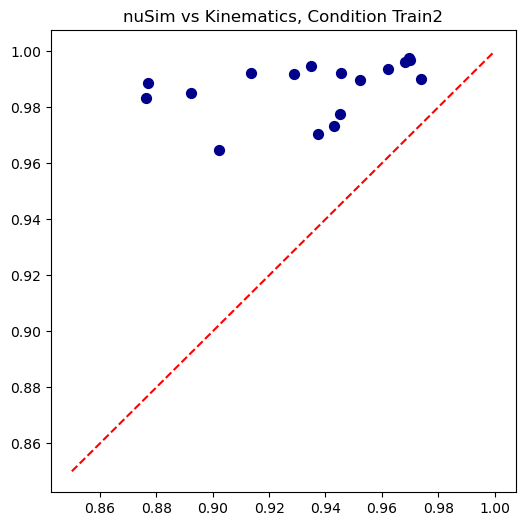

R2 nuSim, Condition Train3 0.9395206132258838
R2 Kinematics, Condition Train3 0.9395206132258838


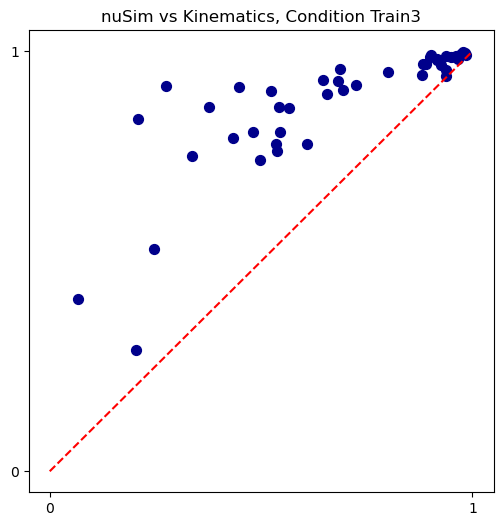

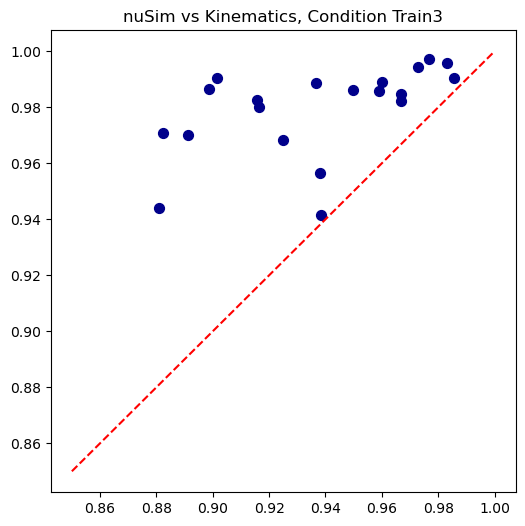

R2 nuSim, Condition Train4 0.8103265852941834
R2 Kinematics, Condition Train4 0.8103265852941834


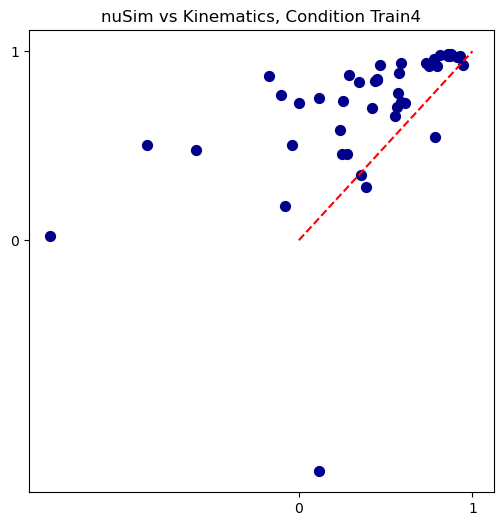

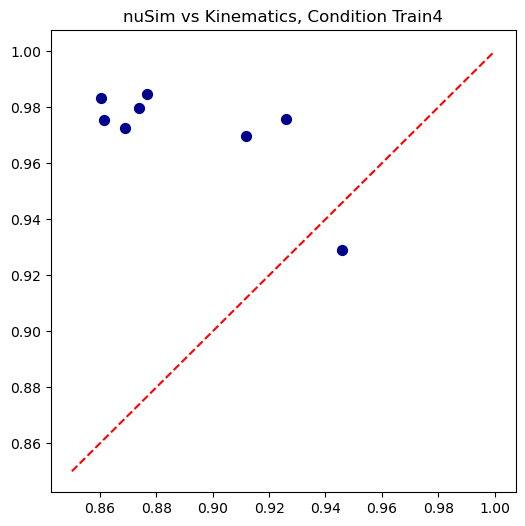

R2 nuSim, Condition Test1 0.8555298450625165
R2 Kinematics, Condition Test1 0.8555298450625165


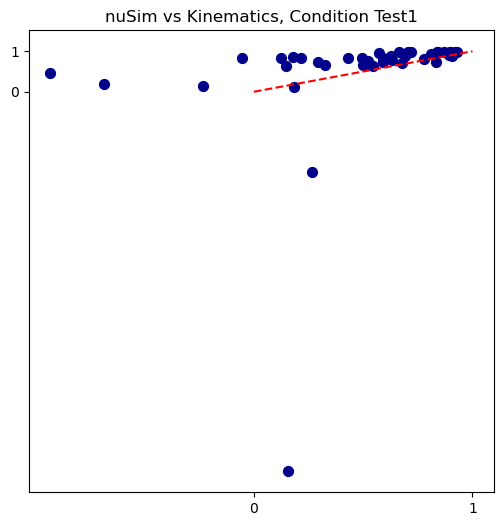

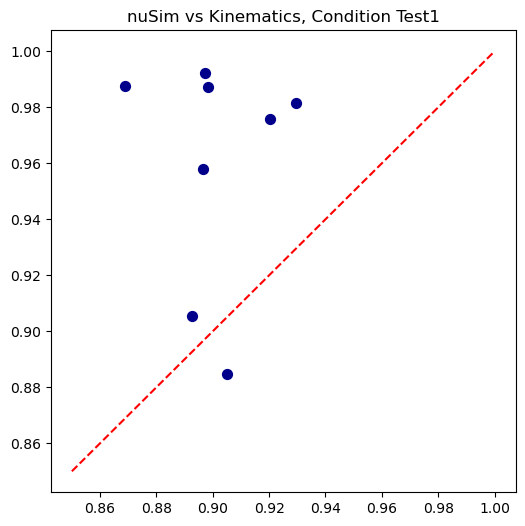

R2 nuSim, Condition Test2 0.9457053092741872
R2 Kinematics, Condition Test2 0.9457053092741872


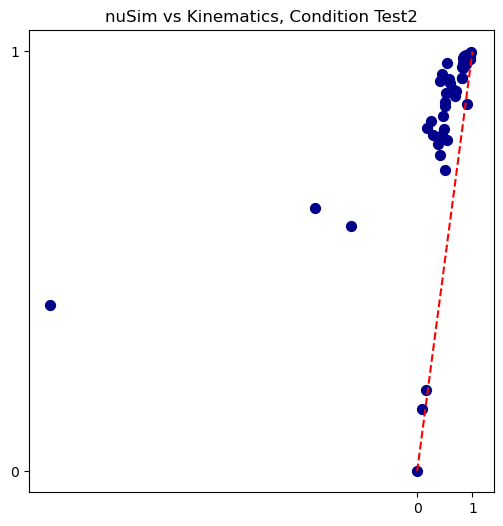

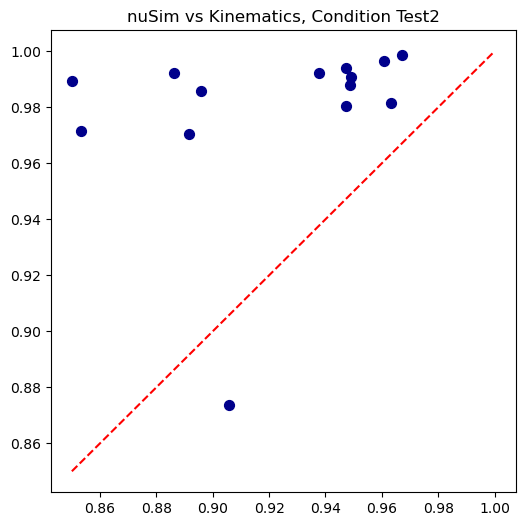

In [9]:
#Load the nusim and experimental activities

#Load nusim for training and testing

with open("./Neural_Analysis/Training/nusim_train.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    nusim_train = pickle.load(file)

with open("./Neural_Analysis/Testing/nusim_test.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    nusim_test = pickle.load(file)

#Load experimental for training and testing

with open("./Neural_Analysis/Training/exp_train.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    exp_train = pickle.load(file)

with open("./Neural_Analysis/Testing/exp_test.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    exp_test = pickle.load(file)

#Load emg for training and testing

with open("./Neural_Analysis/Training/emg_train.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    emg_train = pickle.load(file)

with open("./Neural_Analysis/Testing/emg_test.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    emg_test = pickle.load(file)

#Load kinematics for training and testing

with open("./Neural_Analysis/Training/kin_train.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    kin_train = pickle.load(file)

with open("./Neural_Analysis/Testing/kin_test.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    kin_test = pickle.load(file)

#Load the RNN activities for training and testing

with open("./Neural_Analysis/Training/RNN_train.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    rnn_train = pickle.load(file)

with open("./Neural_Analysis/Testing/RNN_test.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    rnn_test = pickle.load(file)

#Replaced:    A_agent --> A_nusim;   A_exp_619 --> A_exp_held_out; A_nusim_619 --> A_nusim_held_out; 
# pred_net --> pred_nusim; r2_array_net --> r2_array_nusim
# A_RNN --> A_other

#Assign the exp, nusim and other activities
#Merge both the training and testing activities dicts

#First make the keys of all testing different from training
for idx in range(len(exp_test)):
	#Exp
	exp_test[idx+len(exp_train)] = exp_test[idx]
	del exp_test[idx]

	#nuSim
	nusim_test[idx+len(nusim_train)] = nusim_test[idx]
	del nusim_test[idx]

	#emg
	emg_test[idx+len(emg_train)] = emg_test[idx]
	del emg_test[idx]

	#kinematics
	kin_test[idx+len(kin_train)] = kin_test[idx]
	del kin_test[idx]

	#rnn
	rnn_test[idx+len(rnn_train)] = rnn_test[idx]
	del rnn_test[idx]


A_exp_all = {**exp_train, **exp_test}
A_nusim_all ={**nusim_train, **nusim_test}

#Now carry this out for all the training and testing conditions
#i_cond is the held_out condition

#Repeat this for rnn, emg and kin
#Create an array representing all the conditions
A_other_all_models = [{**rnn_train, **rnn_test}, {**emg_train, **emg_test}, {**kin_train, **kin_test}]
model_names = ['Open Loop RNN', 'EMG', 'Kinematics']

for i_comparison in range(len(A_other_all_models)):

	A_other_all = A_other_all_models[i_comparison]

	for i_cond in range(len(A_exp_all)):

		A_exp_held_out = A_exp_all[i_cond]
		A_nusim_held_out = A_nusim_all[i_cond]
		A_other_held_out = A_other_all[i_cond]

		flag_first = 0
		#Concatenate the experimental, nusim and other comparative model activities
		for idx in range(len(A_exp_all)):
			
			if idx != i_cond:
				if flag_first == 0:
					A_exp = A_exp_all[idx]

					#Preprocess the nuSim activities as done with experimental preprocessing
					A_nusim = gaussian_filter1d(A_nusim_all[idx].T, 20).T

					A_other = A_other_all[idx]
					flag_first = 1
				else:
					A_exp = np.concatenate((A_exp, A_exp_all[idx]), axis= 0)
					A_nusim = np.concatenate((A_nusim, A_nusim_all[idx]), axis= 0)
					A_other = np.concatenate((A_other, A_other_all[idx]), axis= 0)

		# A_exp = np.concatenate((A_exp_702, A_exp_803, A_exp_932, A_exp_1106, A_exp_1319), axis=0)
		# A_nusim = np.concatenate((A_agent_702, A_agent_803, A_agent_932, A_agent_1106, A_agent_1319), axis= 0)

		reg_net = Ridge(alpha= 5e-02).fit(A_nusim, A_exp)
		#
		pred_nusim_held_out = reg_net.predict(A_nusim_held_out)

		if i_cond < len(nusim_train):
			print(f"R2 nuSim, Condition Train{i_cond+1}", r2_score(A_exp_held_out, pred_nusim_held_out, multioutput= 'variance_weighted'))
		else:
			print(f"R2 nuSim, Condition Test{i_cond+1-len(nusim_train)}", r2_score(A_exp_held_out, pred_nusim_held_out, multioutput= 'variance_weighted'))

		r2_list = []

		for k in range(pred_nusim_held_out.shape[1]):
		    r_val = r2_score(A_exp_held_out[:,k], pred_nusim_held_out[:, k])
		    r2_list.append(r_val)

		r2_array_nusim = np.array(r2_list)

		# A_other = np.concatenate((A_RNN_702, A_RNN_803, A_RNN_932, A_RNN_1106, A_RNN_1319), axis= 0)

		reg_other = Ridge(alpha= 5e-02).fit(A_other, A_exp)
		pred_other_held_out = reg_other.predict(A_other_held_out)

		if i_cond < len(nusim_train):
			print(f"R2 {model_names[i_comparison]}, Condition Train{i_cond+1}", r2_score(A_exp_held_out, pred_nusim_held_out, multioutput= 'variance_weighted'))
		else:
			print(f"R2 {model_names[i_comparison]}, Condition Test{i_cond+1-len(nusim_train)}", r2_score(A_exp_held_out, pred_nusim_held_out, multioutput= 'variance_weighted'))


		r2_list = []

		for k in range(pred_other_held_out.shape[1]):
		    r_val = r2_score(A_exp_held_out[:,k], pred_other_held_out[:, k])
		    r2_list.append(r_val)
		# print(r2_list)
		r2_array_other = np.array(r2_list)

		r2_diff = r2_array_nusim - r2_array_other
		# Change the order of the diff sort to go from the highest to the lowest index
		diff_sort = np.flip(np.argsort(r2_diff))

		## Now use the diff_sort and pred_net and pred_emg to plot the activities of the neurons for which
		## we have highest difference

		# plt.figure(figsize= (15, 15))

		# for idx, k in enumerate(diff_sort[:10]):
		#     # print(k)
		#     plt.plot(pred_nusim_held_out[:, k]/5 + idx*30, linewidth=3.0, c=(50/255, 205/255, 50/255))
		#     plt.plot(pred_other_held_out[:, k]/5 + idx*30, linewidth=3.0, c=(102/255, 102/255, 0/255))
		#     plt.plot(A_exp_held_out[:, k]/5 + idx*30, linewidth=3.0, c = 'k')

		# plt.ylabel('Reconstructed M1 Activity', size=14)
		# plt.xticks([])
		# plt.yticks([])
		# # plt.savefig('C:/Users/malma/Dropbox/NatureFigs2/Fig2/lin_net_vs_kin_932.eps', format='eps', dpi=600)

		# plt.show()

		### ------------- Plot the scatter plot ------------------------------------------------------
		filter1 = np.where(np.logical_or(r2_array_nusim>=0, r2_array_other>=0))

		plt.figure(figsize= (6, 6))

		plt.scatter(r2_array_other[filter1], r2_array_nusim[filter1], s=50, c= 'darkblue')
		plt.plot([0, 1], [0, 1], '--', c= 'r', linewidth= 1.5)

		plt.xticks([0, 1], ['0', '1'], size= 10)
		plt.yticks([0, 1], ['0', '1'], size= 10)
		if i_cond < len(nusim_train):
			plt.title(f"nuSim vs {model_names[i_comparison]}, Condition Train{i_cond+1}")
		else:
			plt.title(f"nuSim vs {model_names[i_comparison]}, Condition Test{i_cond+1-len(nusim_train)}")
		# plt.savefig('C:/Users/malma/Dropbox/NatureFigs2/Fig2/r2_comparison_619_rnn.svg', format='svg', dpi=300, transparent= True)
		plt.show()

		### ------------- Plot the scatter plot ------------------------------------------------------
		filter1 = np.where(np.logical_and(r2_array_nusim>=0.85, r2_array_nusim<=1))
		filter2 = np.where(np.logical_and(r2_array_other>=0.85, r2_array_other<=1))
		filter = np.intersect1d(filter1, filter2)

		plt.figure(figsize= (6, 6))

		plt.scatter(r2_array_other[filter], r2_array_nusim[filter], s=50, c= 'darkblue')
		plt.plot([0.85, 1], [0.85, 1], '--', c= 'r', linewidth= 1.5)

		# plt.xticks([0, 1], ['0', '1'], size= 10)
		# plt.yticks([0, 1], ['0', '1'], size= 10)
		if i_cond < len(nusim_train):
			plt.title(f"nuSim vs {model_names[i_comparison]}, Condition Train{i_cond+1}")
		else:
			plt.title(f"nuSim vs {model_names[i_comparison]}, Condition Test{i_cond+1-len(nusim_train)}")
		# plt.savefig('C:/Users/malma/Dropbox/NatureFigs2/Fig2/r2_comparison_619_rnn_2.eps', format='svg', dpi=300, transparent= True)
		plt.show()